# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `KNN Classifiers`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed 
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q1.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Anirudh Kaushik<br>
Roll Number: 2020111015

### Dataset

Use the code below to load the Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # used only for visualizing data
import sklearn # used only for rand index score

In [2]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [3]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [4]:
# data information
# X data contain 4d real points
# X_train contain 120 points
# y data contain 1d points (clusters for each of the 4d points)
# there are 3 unique values in y corresponding to three unique clusters

Write your Code below for KNN Classifier.<br>
Use different values of K and test the accuracies.

In [5]:
def init_centroids(samples, n_clusters):
    indices = np.linspace(0,len(samples),len(samples))
    centroid_inds = np.random.choice(indices, n_clusters,replace=False)
    centroids = []
    for i in centroid_inds:
        i = int(i)
        centroids.append(samples[i])
    centroids = np.array(centroids)
    return centroids

In [6]:
def l2_dist(x1,x2):
    dim = x1.shape[0]
    l2_norm = np.linalg.norm((x1-x2),ord=2)
    return l2_norm

In [7]:
def cluster_means(clusters, n_clusters):
    centroids = []
    for i in clusters:
        i = np.array(i)
        centroids.append(np.mean(i, axis=0))
    centroids = np.array(centroids)
    return centroids


In [8]:
def k_means(samples, n_clusters, max_iter):
    centroids = init_centroids(samples,n_clusters)
    
    for epoch in range(max_iter):
        clusters = [[] for i in range(n_clusters)]
        clusters_y = [[] for i in range(n_clusters)]
        for i in range(len(X_train)):
            dist = []
            for j in centroids:
                dist.append(l2_dist(X_train[i],j))
            clusters[dist.index(min(dist))].append(X_train[i])
            clusters_y[dist.index(min(dist))].append(y_train[i])
        centroids = cluster_means(clusters, n_clusters)
    return centroids, clusters, clusters_y

        

In [9]:
def predict_cluster(samples_X, samples_y,centroids,n_clusters):
    clusters = [[] for i in range(n_clusters)]
    clusters_y = [[] for i in range(n_clusters)]
    for i in range(len(samples_X)):
        dist = []
        for j in centroids:
            dist.append(l2_dist(samples_X[i],j))
        clusters[dist.index(min(dist))].append(samples_X[i])
        clusters_y[dist.index(min(dist))].append(samples_y[i])
    return clusters, clusters_y
        

In [10]:
def reduce_dims(clusters):
    points = []
    for i in clusters:
        for j in i:
            points.append(j)
    ind = 0
    pca = PCA(n_components=2)
    pca.fit(points)
    points = pca.transform(points)
    return points

In [11]:
def plot_clusters(pts,clusters,clusters_y):
    labels_pred = []
    for ind,i in enumerate(clusters):
        for j in i:
            labels_pred.append(ind)    
    labels_true = []
    for ind,j in enumerate(clusters_y):
        for i in j:
            if i == 'Iris-versicolor':
                labels_true.append(0)
            if i == 'Iris-virginica':
                labels_true.append(1)
            if i == 'Iris-setosa':
                labels_true.append(2)
    rand_score = sklearn.metrics.rand_score(labels_true, labels_pred)
    print(f"Rand Index score for k = {k}: {round(rand_score,2)}")    
    return rand_score, labels_true, labels_pred


Rand Index score for k = 1: 0.33
Rand Index score for k = 2: 0.76
Rand Index score for k = 3: 0.87
Rand Index score for k = 4: 0.71
Rand Index score for k = 5: 0.81


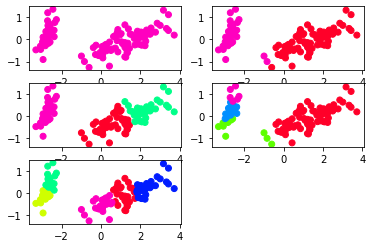

Best Score obtained for clustering with k = 3


In [12]:
k_vals = [1,2,3,4,5]
rand_score_lis = []
labels_true_lis = []
labels_pred_lis = []
centroids_lis = []
for k in k_vals:
    # fit the Model 
    centroids, clusters, clusters_y = k_means(X_train,k,20)
    centroids_lis.append(centroids)
    pts = reduce_dims(clusters)
    rand_score, labels_true, labels_pred = plot_clusters(pts,clusters,clusters_y)
    plt.subplot(3, 2, k)
    plt.scatter(pts[:,0],pts[:,1], c=labels_pred, cmap=plt.cm.get_cmap('gist_rainbow', k))    
    rand_score_lis.append(rand_score)
    labels_true_lis.append(labels_true)
    labels_pred_lis.append(labels_pred)
plt.show()

print(f"Best Score obtained for clustering with k = {rand_score_lis.index(max(rand_score_lis)) + 1}")

Rand Index score for k = 1: 0.34
Rand Index score for k = 2: 0.78
Rand Index score for k = 3: 0.89
Rand Index score for k = 4: 0.72
Rand Index score for k = 5: 0.75


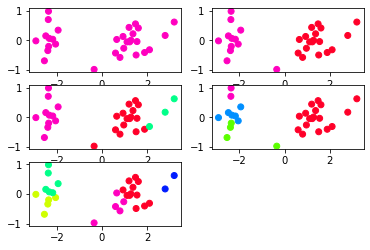

Best Score obtained for clustering with k = 3


In [13]:
# Testing
rand_score_lis = []
for k in k_vals:
    clusters_pred, clusters_pred_y = predict_cluster(X_test, y_test,centroids_lis[k-1],k)
    pts = reduce_dims(clusters_pred)
    rand_score, labels_true, labels_pred = plot_clusters(pts,clusters_pred,clusters_pred_y)
    plt.subplot(3, 2, k)
    plt.scatter(pts[:,0],pts[:,1], c=labels_pred, cmap=plt.cm.get_cmap('gist_rainbow', k))    
    rand_score_lis.append(rand_score)
plt.show()

print(f"Best Score obtained for clustering with k = {rand_score_lis.index(max(rand_score_lis)) + 1}")
    

### Questions

1) What are the Advantages and Disadvantages of KNN algorithm?<br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br> 
3) Is euclidian distance the only distance metric used in KNN? 
4) what K value gave the best accuracy?

#### Answers
##### Answer  1. 
 - Advantages:
  - Easy and straightforward implementation.
  - No training period (lazy learning) learns only at the time of making predictions.
  - New data can be added without affecting accuaracy of the algorithm
  - No assumptions are made about the data.
 - Disadvantages:
  - In large datasets, calculating distances between each data instance is very costly and hence it is unsuitable.
  - Data in higher dimensions greatly increases the cost of calculating pairwise distances and hence it is unsuitable for higher dimensions.
  - High sensitivity to noisy and missing data
  - Requires Feature Scaling Data in all the dimension should be scaled (normalized and standardized) properly .

##### Answer 2.
 - As explained earlier, KNN is a lazy learning algorithm and hence there is no Training Period. The time complexity of the kNN algorithm during testing period is O(N*d) where N is the total number of data-points in the data and d is dimensionality of the data. All distances will be computed for a new query point which is very time consuming.
 
##### Answer 3. 
 - Any distance metric can be used for KNN, it can be used for a variety of tasks and the distance metric can be chosen as per the task for example edit distance for checking similarity between string or minkowski distance, etc.
 
##### Answer 4.
 - Best Clustering accuracy (we use rand score to check accuracy since it is the most suitable metric when true labels and predicted labels are both available) is obtained with K = 3, which means the true number of classes for this data set is 3. Sometimes, depending on initialisation values, k = 5 gives slightly better accuracy, however this is because of random initialisation and becuase the rand score is such that it checks the number of elements in the same class in the true set and compares it with number of labels which have the same true label and are in the same cluster, thus for higher values of k we obtain greater rand score.